## HIGH DIMENSIONAL ANALYSIS
### Programming Exercise: 03
### Nguyễn Quốc Bảo - 18110053

# Table of Content
1. Introduction
2. Read data
3. Apply Kmean to clustering from scratch
4. Compare with sklearn and ground truth (Private attribute)

## Introduction

Statistics for a large number of US Colleges from the 1995 issue of US News and
World Report, with 777 observations on the following 18 variables.
1. Private: A factor with levels No and Yes indicating private or public university
2. Apps: Number of applications received
3. Accept: Number of applications accepted
4. Enroll: Number of new students enrolled
5. Top10perc: Pct. new students from top 10% of H.S. class
6. Top25perc: Pct. new students from top 25% of H.S. class
7. F.Undergrad: Number of fulltime undergraduates
8. P.Undergrad: Number of parttime undergraduates
9. Outstate: Out-of-state tuition
10. Room.Board: Room and board costs
11. Books: Estimated book costs
12. Personal: Estimated personal spending
13. PhD: Pct. of faculty with Ph.D.’s
14. Terminal: Pct. of faculty with terminal degree
15. S.F.Ratio: Student/faculty ratio
16. perc.alumni: Pct. alumni who donate

## Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist,euclidean
from numpy.linalg import norm
from sklearn.preprocessing import StandardScaler

plt.style.use("fivethirtyeight")

## Read data

In [2]:
path = './College.csv'
data = pd.read_csv(path, index_col=0)
print(data.shape)
data.head()

(777, 18)


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
# Check NULL 
data.isnull().sum()

Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [4]:
data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


### a) Find all private schools with a graduation rate of higher than 90%.

In [5]:
# filter dataframe 
data.loc[ (data['Private'] == 'Yes') & (data['Grad.Rate'] >= 90)]


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Amherst College,Yes,4302,992,418,83,96,1593,5,19760,5300,660,1598,93,98,8.4,63,21424,100
Barnard College,Yes,2496,1402,531,53,95,2121,69,17926,8124,600,850,83,93,10.3,33,12580,91
Bowdoin College,Yes,3356,1019,418,76,100,1490,8,19030,5885,1495,875,93,96,11.2,52,20447,96
Brown University,Yes,12586,3239,1462,87,95,5643,349,19528,5926,720,1100,99,100,7.6,39,20440,97
Bucknell University,Yes,6548,3813,862,49,85,3316,31,18550,4750,800,1200,95,97,14.2,36,13675,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wesleyan University,Yes,4772,1973,712,60,86,2714,27,19130,5600,1400,1400,90,94,12.1,39,16262,92
Williams College,Yes,4186,1245,526,81,96,1988,29,19629,5790,500,1200,94,99,9.0,64,22014,99
Wingate College,Yes,1239,1017,383,10,34,1207,157,7820,3400,550,1550,69,81,13.9,8,7264,91
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


### b) Using all attributes from the initial dataset except for the Private attribute, do the K-mean clustering method with two clusters. After this step, we will split the original data into two groups (private or not).

In [6]:
X = data.drop(['Private'], axis = 1).values
y = data['Private']
X.shape

(777, 17)

## Compress data into 2 dimensionality to visualize

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X)
X_pca_2d.shape

(777, 2)

In [8]:
# Cumulative proportion
cumulative = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative proportion after compress data into 2 dimensionality: ', cumulative[-1])

Cumulative proportion after compress data into 2 dimensionality:  0.8708234760066114


(array([0, 1], dtype=int64), array([212, 565], dtype=int64))


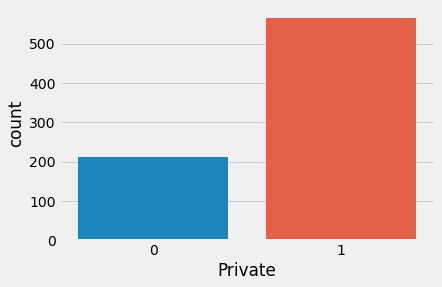

In [9]:
# Replace value of Private
y.replace({'Yes' : 1, 'No': 0},inplace=True)
# plot number of Private
sns.countplot(y)
print(np.unique(y, return_counts=True))

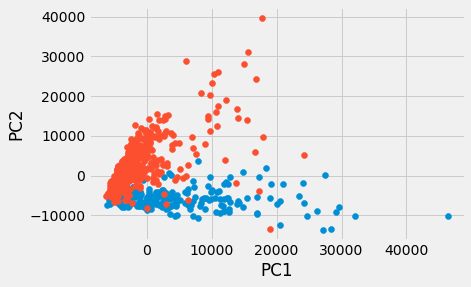

In [10]:
plt.scatter(X_pca_2d[y == 0,0], X_pca_2d[y == 0,1])
plt.scatter(X_pca_2d[y == 1,0], X_pca_2d[y == 1,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Apply Kmean to clustering from scratch

Algorithm of K-mean:
1. Choose the number of clusters k.
2. Select k random points from the data as centroids.
3. Assign all the points to the closest cluster centroid.
4. Recompute the centroids of newly formed clusters.
5. Repeat steps 3 and 4.

In [11]:
# plot scatter for each class
def plot_kmean(X, label, centroids, figsize = None , ax = None):
    plt.figure(figsize=figsize)
    ax = ax or plt.gca()
    
    n_clusters = len(np.unique(label))
    labels= ['cluster '+  str(k+1) for k in range(n_clusters) ] 
    for k in range(n_clusters):
        ax.scatter(X[ label == k ][:,0],X[label == k][:,1] , label=labels[k],s = 45)
    ax.scatter(centroids[:,0],centroids[:,1],marker = '*',s=150,c='k',label='Centroids')    
    ax.legend()

In [12]:
class Kmeans:
    def __init__(self, n_clusters, max_iter = 100, random_state=None):
        """
        Parameter:
            n_clusters: int, default=8
                The number of clusters to form as well as the number of centroids to generate.
                    
            max_iter: int, default=300
                Maximum number of iterations of the k-means algorithm for a single run.
                
            random_state; int, RandomState instance or None, default=None
                Determines random number generation for centroid initialization. 
                Use an int to make the randomness deterministic
         Returns
            -------
            centroids : ndarray of shape (n_clusters, n_features)
                Centroids found at the last iteration of k-means.
                
            labels : ndarray of shape (n_samples,)
                label[i] is the code or index of the centroid the
                i'th observation is closest to.
                
            inertia : float
                The final value of the inertia criterion (sum of squared distances to
                the closest centroid for all observations in the training set).
                
            n_iter : int
                Number of iterations run
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state 
    
    def _init_centroid(self,X):
        # randomly pick n_clusters rows of X as initial centers
        random_St = np.random.RandomState(self.random_state)
        random_idx = random_St.permutation(X.shape[0])
        return X[random_idx[:self.n_clusters]]

    def _compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0],self.n_clusters))
        # calculate pairwise distances btw data and centers
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis = 1)
            distance[:,k] = np.square(row_norm)
        return distance/self.n_clusters

    def find_closest_centroid(self, distance):
        # return index of the closest center
        return np.argmin(distance, axis = 1)

    def _update_centroids(self, X, labels):
        centroids = np.ones((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            # collect all points assigned to the k-th cluster 
            Xk = X[labels == k, :]
            # take average
            centroids[k,:] = np.mean(Xk, axis = 0)
        return centroids

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis = 1)
        return np.sum(np.square(distance))
        

    def fit(self, X):
        self.centroids = self._init_centroid(X)
        it = 0 
        while it < self.max_iter:
            old_centroids = self.centroids
            distance = self._compute_distance(X, old_centroids)
            
            # Assign labels based on closest centroid
            self.labels = self.find_closest_centroid(distance)

            # Find new centroid from means of points
            self.centroids = self._update_centroids(X, self.labels)
            
            # check two sets of centers are the same
            if (old_centroids == self.centroids).all():
                self.n_iter = it
                break
            it += 1
        self.inertia_ = self.compute_sse(X, self.labels, self.centroids)

    def predict(self,X):
        distance = self._compute_distance(X,self.centroids)
        self.labels = self.find_closest_centroid(distance)
        return self.labels

In [13]:
sse = []
for k in range(1, 11):
    kmean = Kmeans(n_clusters=k ,random_state=0)
    kmean.fit(X)
    sse.append(kmean.inertia_)

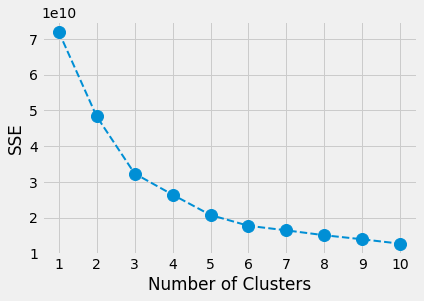

In [14]:

plt.plot(range(1, 11), sse, marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [15]:
# We choose 2 cluster  
kmean = Kmeans(n_clusters=2, max_iter=100 ,random_state = 15)
kmean.fit(X_pca_2d)
print(kmean.inertia_)
y_pred = kmean.predict(X_pca_2d)

39129894622.78202


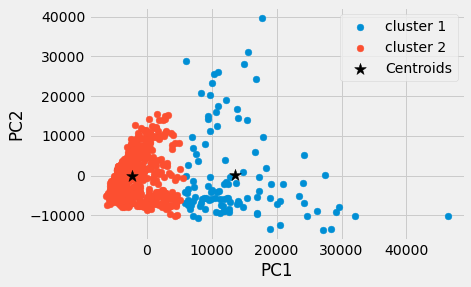

In [16]:
plot_kmean(X_pca_2d, y_pred, kmean.centroids)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

(array([0, 1], dtype=int64), array([109, 668], dtype=int64))


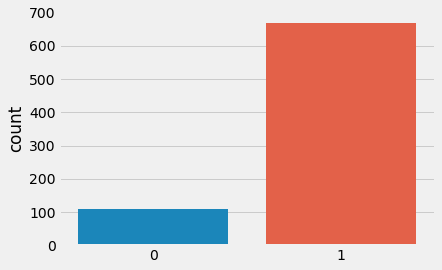

In [17]:
# plot number of Private
sns.countplot(y_pred)
print(np.unique(y_pred, return_counts=True))

## Using sklean to clustering

Cluster by scikit-learn:
39129894622.781944


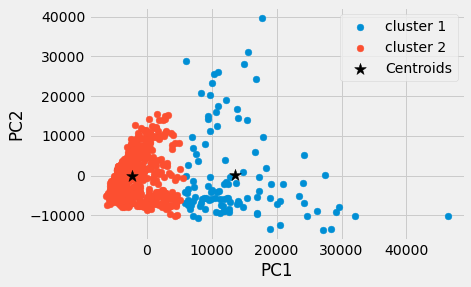

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(init='random',n_clusters=2, random_state=15, n_init=10, max_iter=100).fit(X_pca_2d)
print('Cluster by scikit-learn:')
print(kmeans.inertia_)
pred_label = kmeans.predict(X_pca_2d)
plot_kmean(X_pca_2d, pred_label, kmeans.cluster_centers_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

(array([0, 1]), array([109, 668], dtype=int64))


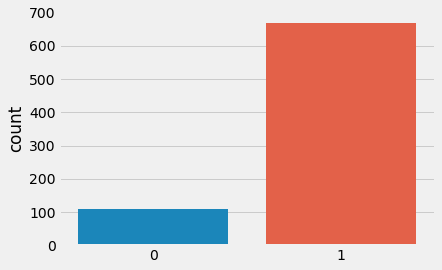

In [19]:
sns.countplot(pred_label)
print(np.unique(pred_label, return_counts=True))

### split the original data into two groups (private or not)

In [20]:
Private_predict =  pd.DataFrame(X[y_pred == 1], columns= data.drop('Private', axis=1).columns, index = data[y_pred == 1].index)
NotPrivate_predict =  pd.DataFrame(X[y_pred == 0],columns= data.drop('Private', axis=1).columns,index = data[y_pred == 0].index)

In [21]:
# split data into 2 groups with predict from clustering 
print(Private_predict.shape , NotPrivate_predict.shape)

(668, 17) (109, 17)


In [22]:
Private_predict.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,1807.486527,1282.616766,489.194611,25.321856,53.507485,2177.561377,590.628743,10395.103293,4310.573353,541.925150,1280.681138,70.408683,77.797904,14.091916,23.199102,8935.311377,65.148204
std,1559.811009,1002.868001,397.653904,15.138036,18.863550,2012.009748,937.966902,3877.881390,1063.657532,169.994172,658.694706,16.300561,14.857127,3.697071,12.446739,3423.420999,17.060099
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2580.000000,1780.000000,110.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.000000
25%,667.250000,542.500000,221.750000,15.000000,40.000000,925.750000,81.000000,7410.750000,3583.750000,450.000000,800.000000,60.000000,68.000000,11.600000,13.000000,6648.250000,53.000000
50%,1259.500000,955.500000,366.000000,22.000000,52.000000,1418.000000,296.000000,10100.000000,4185.000000,500.000000,1155.500000,73.000000,79.000000,13.500000,22.000000,8132.000000,65.000000
75%,2422.000000,1729.250000,611.000000,33.000000,66.000000,2675.500000,714.750000,12831.250000,4980.000000,600.000000,1585.500000,82.000000,90.000000,16.100000,32.000000,10234.750000,78.000000
max,8598.000000,5526.000000,3147.000000,95.000000,100.000000,11493.000000,9310.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,22906.000000,118.000000


In [23]:
Private_original =  data[data['Private'] == 1]
NotPrivate_original =  data[data['Private'] == 0]

In [24]:
# split data into 2 groups with label original
print(Private_original.shape , NotPrivate_original.shape)

(565, 18) (212, 18)


In [25]:
Private_original.describe()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,565.0,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,1.0,1977.929204,1305.702655,456.945133,29.330973,56.957522,1872.168142,433.966372,11801.693805,4586.143363,547.506195,1214.440708,71.093805,78.534513,12.945487,25.890265,10486.353982,68.998230
std,0.0,2443.341319,1369.549478,457.529136,17.851391,19.588360,2110.661773,722.370487,3707.470822,1089.697557,174.932303,632.879647,17.350886,15.450251,3.518573,12.400755,5682.576587,16.749457
min,1.0,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,2370.000000,250.000000,250.000000,8.000000,24.000000,2.500000,2.000000,3186.000000,15.000000
25%,1.0,619.000000,501.000000,206.000000,17.000000,42.000000,840.000000,63.000000,9100.000000,3736.000000,450.000000,800.000000,60.000000,68.000000,11.100000,16.000000,7477.000000,58.000000
50%,1.0,1133.000000,859.000000,328.000000,25.000000,55.000000,1274.000000,207.000000,11200.000000,4400.000000,500.000000,1100.000000,73.000000,81.000000,12.700000,25.000000,8954.000000,69.000000
75%,1.0,2186.000000,1580.000000,520.000000,36.000000,70.000000,2018.000000,541.000000,13970.000000,5400.000000,600.000000,1500.000000,85.000000,92.000000,14.500000,34.000000,11625.000000,81.000000
max,1.0,20192.000000,13007.000000,4615.000000,96.000000,100.000000,27378.000000,10221.000000,21700.000000,8124.000000,2340.000000,6800.000000,100.000000,100.000000,39.800000,64.000000,56233.000000,118.000000


### c) Illustrate the predicted cluster and Private attribute (ground truth) to compare them. Please write your comment about the results.

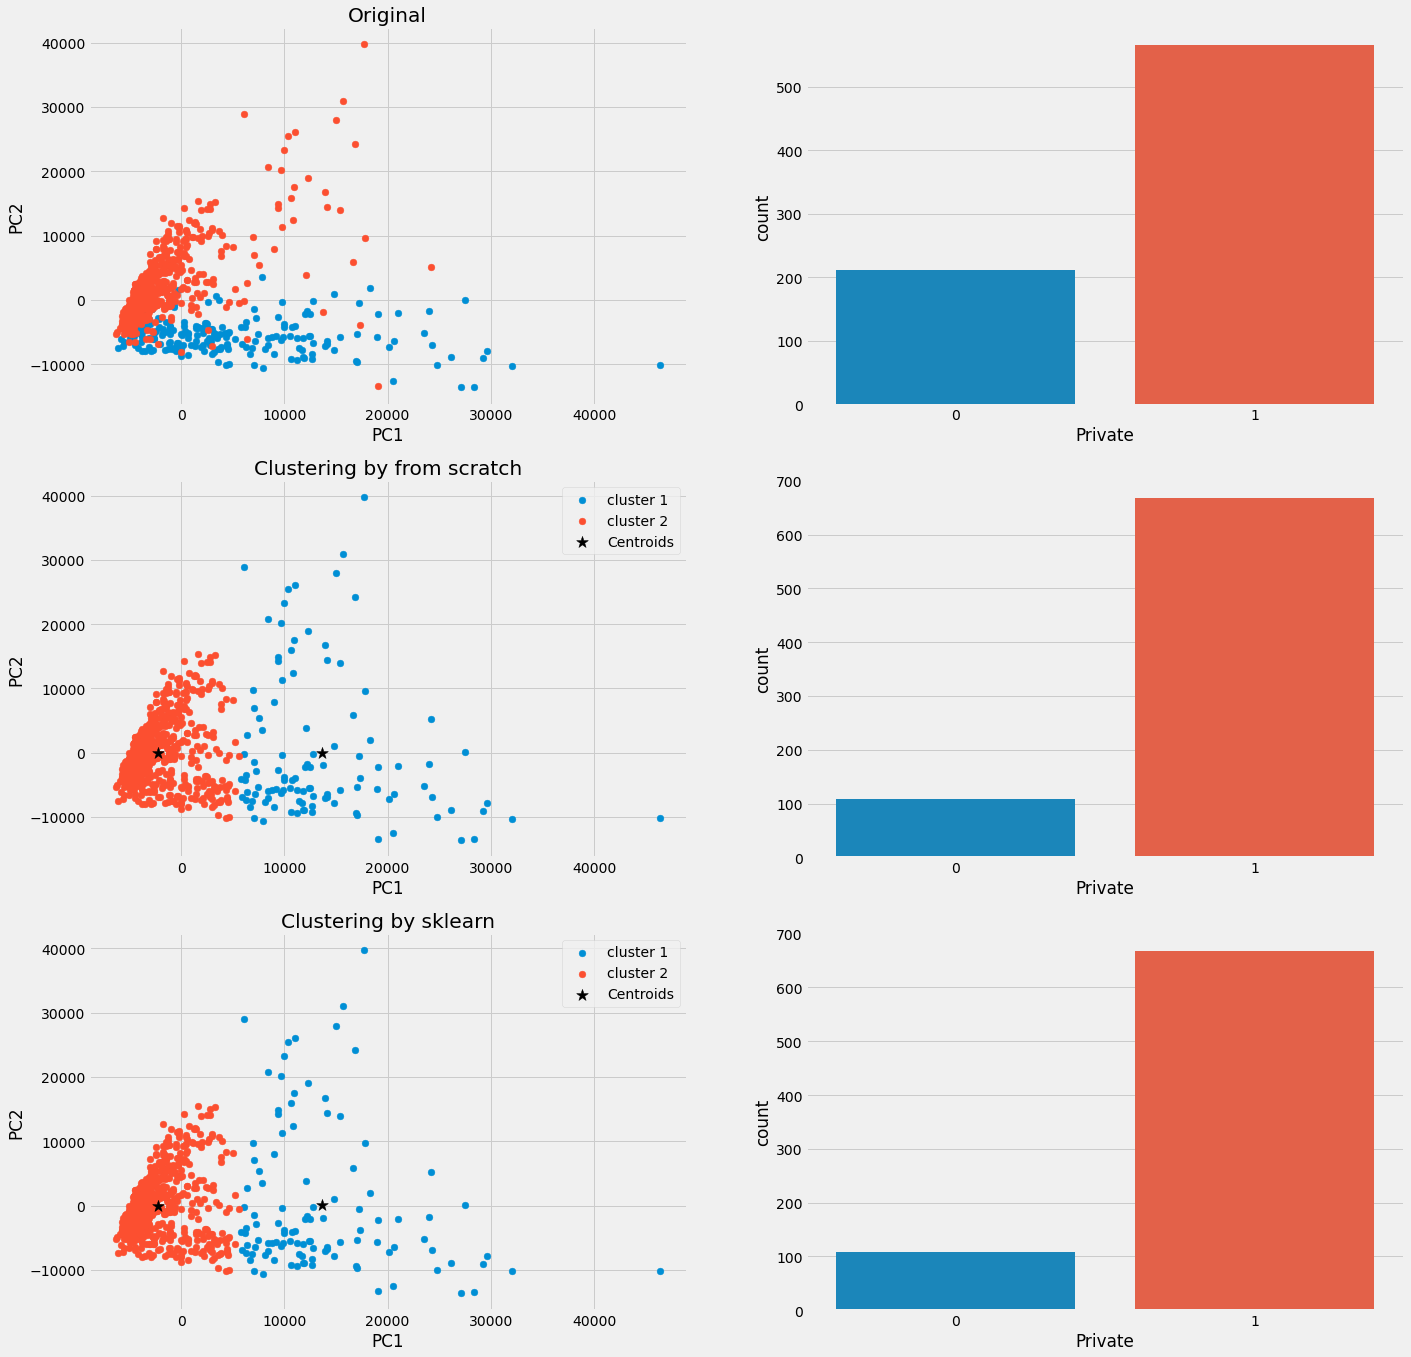

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [26]:
fig, ax = plt.subplots(3,2 , figsize = (21,22))
ax[0,0].scatter(X_pca_2d[y == 0,0], X_pca_2d[y == 0,1], s = 45)
ax[0,0].scatter(X_pca_2d[y == 1,0], X_pca_2d[y == 1,1], s = 45)
ax[0,0].set_xlabel('PC1')
ax[0,0].set_ylabel('PC2')
ax[0,0].set_title('Original')

sns.countplot(y, ax = ax[0,1])

plot_kmean(X_pca_2d,y_pred, kmean.centroids ,ax = ax[1,0])
ax[1,0].set_title('Clustering by from scratch')
ax[1,0].set_xlabel('PC1')
ax[1,0].set_ylabel('PC2')
sns.countplot(y_pred , ax = ax[1,1])
ax[1,1].set_xlabel('Private')

plot_kmean(X_pca_2d, pred_label, kmeans.cluster_centers_, ax = ax[2,0])
ax[2,0].set_title('Clustering by sklearn')
ax[2,0].set_xlabel('PC1')
ax[2,0].set_ylabel('PC2')
sns.countplot(pred_label, ax = ax[2,1])
ax[2,1].set_xlabel('Private')


plt.show()

## Nhận xét:
#### Sau khi clustering thì có thể thấy tập dữ liệu phân chia label tách biệt hẳn. Còn với dữ liệu ban đầu label bị trộn lẫn vào nhau khá nhiều.

#### Vì dữ liệu ban đầu mất cân bằng số lượng label và sự phân tán dữ liệu nên nó sẽ nghiêm trọng hơn sau khi clustering. Do tính chất của thuật toán K-mean khi tính khoảng cách so với centroids nó sẽ hội tụ về các điểm dữ liệu gần với nó.

#### Và clustering by from scratch có vẻ khá tốt so với sklean.